<a href="https://colab.research.google.com/github/Clarke-Jools-36/diss-gw/blob/testing/autoencoder_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am going to attempt to set up a simple autoencoder. First I need to create data on which to test and train the autoencoder. I will create gravitational wave sections 1 second long with 1024 samples. 
I will also create artefacts which are not gravitational waves. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
a = np.zeros_like(t) #create an array of zeros to populate with amplitude values

In [23]:
print(len(a))
print(len(a)==len(t)) #idiot check early :)

1024
True


Lets start with an artifact, a sin wave which has amplidue of a bell curve

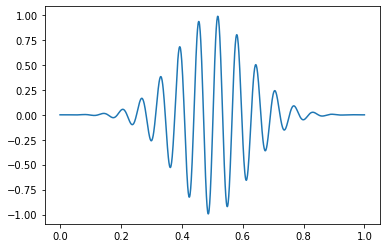

In [84]:
## SIN WAVE ##
A = 0 #amplitude
B = 0.01 #period
C = 0 #phase shift (horizontal)
D = 0 #amplitude shift (vertical)
## BELL CURVE ##
b = 0.03 #width of bell curve describing amplitude
c = 0.5  #phase shift (horizontal) of bell curve

for i,t_ in enumerate(t):
  A = np.e**( -((t_-c)**2 / b) ) #setting amplidude to bell curve
  #plt.plot(t_, A, "x")

  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)

We can also make the frequency of the sin wave lower at the tail ends. 

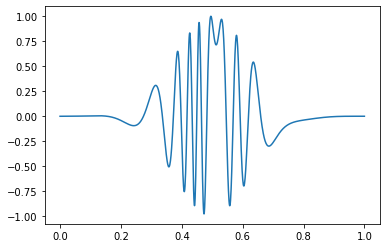

In [86]:
for i,t_ in enumerate(t):
  A = np.e**( -((t_-c)**2 / b) ) #setting amplidude to bell curve
  
  B = -0.035 * (np.e**( -((t_-c)**2 / b) )) + 0.05 #setting freq to bell curve
  #plt.plot(t_, B, "x")
  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)

Something funky is happening here, potentially because of the syncing with the sample rate?

Lets move on to grav wave like signals. These are less symettrical



In [87]:
t = np.linspace(0,1,1024) #create an array of time between 0 and 1 second with 1024 samples
a = np.zeros_like(t) #create an array of zeros to populate with amplitude values

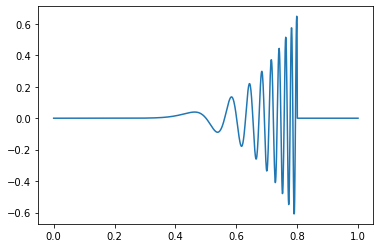

In [125]:
## SIN WAVE ##
A = 0 #amplitude
B = 0.01 #period
C = 0 #phase shift (horizontal)
D = 0 #amplitude shift (vertical)
## BELL CURVE ##
b = 0.03 #width of bell curve describing amplitude
c = 0.5  #phase shift (horizontal) of bell curve

for i,t_ in enumerate(t):
  if 0<t_<0.8:
    A = 2*t_**5 # amplitude increases with polynomial 5
    B = 0.005/t_**5 #freq increases
  else:
    A = 0

  a[i] = A * np.sin( (1/B) * (t_ - C) ) + D

plt.plot(t,a)